In [1]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))

<h2>User Analytics in the Telecommunication Industry - Overview</h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


listing column names

In [4]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

Number of data points 

In [5]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


## Handling Missing Values

In [6]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The dataset contains 12.5 % missing values.


In [7]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Checking the percentage of each column of missing values

In [8]:
# To see the percentage of missing values of every columns
def every_column_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_db = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})

    missing_value_db.sort_values('percent_missing', inplace=True)

    print(missing_value_db)


every_column_percent_missing(db)

                                                                       column_name  \
Youtube DL (Bytes)                                              Youtube DL (Bytes)   
Other UL (Bytes)                                                  Other UL (Bytes)   
Other DL (Bytes)                                                  Other DL (Bytes)   
Gaming UL (Bytes)                                                Gaming UL (Bytes)   
Gaming DL (Bytes)                                                Gaming DL (Bytes)   
Netflix UL (Bytes)                                              Netflix UL (Bytes)   
Netflix DL (Bytes)                                              Netflix DL (Bytes)   
Youtube UL (Bytes)                                              Youtube UL (Bytes)   
Email UL (Bytes)                                                  Email UL (Bytes)   
Email DL (Bytes)                                                  Email DL (Bytes)   
Google UL (Bytes)                                     

In [9]:
# drop columns with more than 50% missing values
df_clean = db.drop(['HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 37500B < Vol UL'], axis=1)

df_clean.shape

(150001, 45)

In [10]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [11]:
# how many missing values exist on the new cleaned dataset on percentage ?

percent_missing(df_clean)


The dataset contains 1.02 % missing values.


In [12]:
#Dealing missing values exists like fill-forward,backward-fill

In [13]:
#df_clean['# fill missing with ffill method for columns ()

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['Dur. (ms).1'] = fix_missing_ffill(df_clean, 'Dur. (ms).1')
df_clean['Activity Duration DL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration DL (ms)')
df_clean['Activity Duration UL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration UL (ms)')
df_clean['Total UL (Bytes)'] = fix_missing_ffill(df_clean, 'Total UL (Bytes)')
df_clean['Total DL (Bytes)'] = fix_missing_ffill(df_clean, 'Total DL (Bytes)')
df_clean['Avg Bearer TP DL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP DL (kbps)')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')
df_clean['Start ms'] = fix_missing_ffill(df_clean, 'Start ms')
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['Avg Bearer TP UL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP UL (kbps)')
df_clean['End ms'] = fix_missing_ffill(df_clean, 'End ms')
df_clean['Dur. (ms)'] = fix_missing_ffill(df_clean, 'Dur. (ms)')
df_clean['IMSI'] = fix_missing_ffill(df_clean, 'IMSI')
df_clean['DL TP > 1 Mbps (%)'] = fix_missing_ffill(df_clean, 'DL TP > 1 Mbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fix_missing_ffill(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['DL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol UL < 1250B')
df_clean['Bearer Id'] = fix_missing_ffill(df_clean, 'Bearer Id')
df_clean['Last Location Name'] = fix_missing_ffill(df_clean, 'Last Location Name')

# fill 'Handset Type, Handset Manufacturer, IMEI & MSISDN/Number' column with mode 
df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(df_clean['Handset Type'].mode()[0])
df_clean['IMEI'] = df_clean['IMEI'].fillna(df_clean['IMEI'].mode()[0])
df_clean['MSISDN/Number'] = df_clean['MSISDN/Number'].fillna(df_clean['MSISDN/Number'].mode()[0])


## Transforming Data

**Scaling and Normalization**

In [14]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1768,24.145206
1209,83.877623
527,185.240648
1333,304.315429
519,203.328611


In [15]:
original_data[0].min(), original_data[0].max()

(0.023837889119919957, 1591.2451322793074)

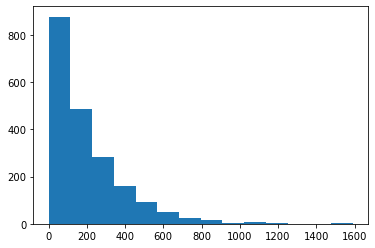

In [16]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

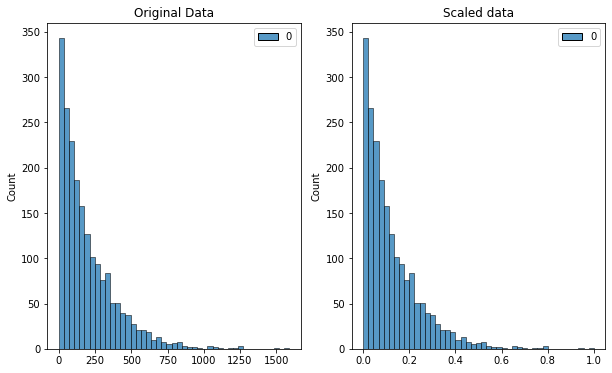

In [17]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

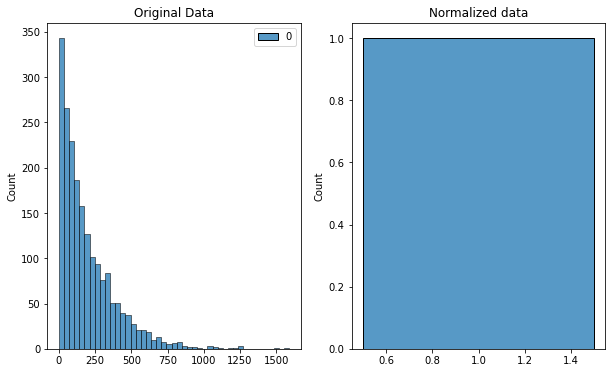

In [18]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [19]:
# check datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [20]:
display(HTML('<h2> Identify the top 10 handsets used by the customers</h2>'))


In [21]:
#Counting Handset Manufacturers

top3 = df_clean['Handset Manufacturer'].value_counts().head(3)
top3


Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

<AxesSubplot:ylabel='Handset Manufacturer'>

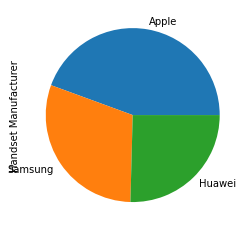

In [22]:
#visualising using pie chart
top3.plot.pie()

In [23]:
display(HTML('<h2> Identify the top 3 handset manufacturers</h2>'))


In [24]:
#Counting Handset Types

top10 = df_clean['Handset Type'].value_counts().head(10)

top10


Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

<AxesSubplot:>

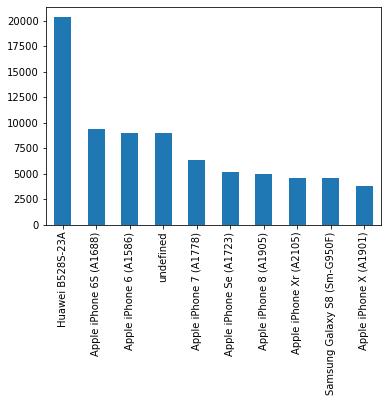

In [25]:
#Visualising using bar graph
top10.plot.bar()

In [26]:
display(HTML('<h2> Identify the top 5 handsets per top 3 handset manufacturer</h2>'))

In [27]:
#Top 5 apple handsets 
top_apple = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Apple'].head(5)
top_apple
#top_apple.plot.bar()

Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [28]:
#Top 5 samsung handsets
top_samsung = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Samsung'].head(5)
top_samsung
# top_samsung.plot.bar()

Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [29]:
#Top 5 Huawei handset
top_huawei = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Huawei'].head(5)
top_huawei
# top_huawei.plot.bar

Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [30]:
display(HTML('<h2> Task 1.1 - An overview of the users’ behavior on those applications</h2>'))


In [31]:
#●	Aggregate per user the following information in the column  
#     ○	number of xDR sessions
#     ○	Session duration
#     ○	the total download (DL) and upload (UL) data
#     ○	the total data volume (in Bytes) during this session for each application

#Code Credit - Daniel - https://github.com/daniEL2371

sessions = df_clean.groupby('MSISDN/Number').agg({'Bearer Id': 'count'})
sessions = sessions.rename(columns= {'Bearer Id': 'xDR_sessions'})
sessions.sort_values(by=['xDR_sessions'], ascending = False).head(10)

,xDR_sessions
MSISDN/Number,
3.362632e+10,1084
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.376054e+10,15
3.367588e+10,15
3.366716e+10,13
3.362708e+10,12
3.360452e+10,12


In [32]:
# we group the data using  msisdn (customer number) and find sum the the duration for each customer

durations = df_clean.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'sum'})


durations=durations.rename(columns= {'Dur. (ms).1': 'total_duration(ms)'})
durations.sort_values(by=['total_duration(ms)'], ascending = False).head(10)

,total_duration(ms)
MSISDN/Number,
3.362632e+10,8.133679e+10
3.362578e+10,1.855376e+10
3.361489e+10,9.966906e+09
3.376054e+10,9.279442e+09
3.366716e+10,8.744922e+09
3.366284e+10,6.614274e+09
3.366469e+10,6.288736e+09
3.360313e+10,6.287767e+09
3.366746e+10,5.649885e+09


In [33]:
# the total download (DL) and upload (UL) data¶

total_data_df = df_clean[['MSISDN/Number','Total UL (Bytes)','Total DL (Bytes)']].copy()
total_data_df = total_data_df.groupby('MSISDN/Number').sum()
total_data_df['total_data(bytes)'] = total_data_df['Total UL (Bytes)'] + total_data_df['Total DL (Bytes)']
total_data_df.sort_values(by=['total_data(bytes)'], ascending = False).head(10)

,Total UL (Bytes),Total DL (Bytes),total_data(bytes)
MSISDN/Number,,,
3.362632e+10,4.502458e+10,4.945971e+11,5.396216e+11
3.361489e+10,6.894830e+08,8.156743e+09,8.846226e+09
3.376054e+10,7.034786e+08,7.811295e+09,8.514774e+09
3.362578e+10,7.295774e+08,7.770043e+09,8.499621e+09
3.367588e+10,5.815688e+08,7.309542e+09,7.891111e+09
3.365973e+10,6.242603e+08,7.081602e+09,7.705863e+09
3.366646e+10,4.050610e+08,6.903440e+09,7.308501e+09
3.376041e+10,5.215189e+08,6.610852e+09,7.132371e+09
3.366471e+10,4.712445e+08,6.400774e+09,6.872018e+09


In [34]:
df_clean["social_media"] = df_clean["Social Media DL (Bytes)"] + df_clean['Social Media UL (Bytes)']
df_clean["google"] = df_clean["Google DL (Bytes)"] + df_clean["Google UL (Bytes)"]
df_clean['email'] = df_clean["Email DL (Bytes)"] + df_clean["Email UL (Bytes)"]
df_clean['youtube'] = df_clean["Youtube DL (Bytes)"] + df_clean["Youtube UL (Bytes)"]
df_clean['netflix'] = df_clean["Netflix DL (Bytes)"] + df_clean["Netflix UL (Bytes)"]
df_clean["gaming"] = df_clean["Gaming DL (Bytes)"] + df_clean["Gaming UL (Bytes)"]
df_clean['other']= df_clean["Other DL (Bytes)"]+ df_clean["Other UL (Bytes)"]
df_clean['total_data'] = df_clean['Total UL (Bytes)'] + df_clean['Total UL (Bytes)']

In [35]:

total_data = df_clean[['MSISDN/Number','social_media','google',
                             'email', 'youtube','netflix', 'gaming','other']].copy()

In [36]:
total_data.groupby('MSISDN/Number').sum().sample(5)

,social_media,google,email,youtube,netflix,gaming,other
MSISDN/Number,,,,,,,
3.360126e+10,2946390.0,19759199.0,5435097.0,45513329.0,39904736.0,384849051.0,1.601052e+09
3.363870e+10,1514592.0,2865427.0,1070752.0,31265919.0,11644414.0,297097602.0,4.988706e+08
3.365853e+10,226708.0,5453898.0,4043746.0,9195840.0,14092207.0,295330334.0,8.521343e+07
3.366277e+10,1722622.0,10614243.0,2887048.0,9960090.0,24255926.0,586159186.0,7.438291e+08
3.366321e+10,2115523.0,4670729.0,406015.0,44688763.0,37215591.0,408302440.0,3.353879e+08


In [41]:
# df_clean.to_csv('cleaned.csv')

In [37]:
display(HTML('<h2> Task 1.2 - An exploratory data analysis on those data & communicate useful insights</h2>'))


In [38]:
# An approach to analyzing data sets to summarize their main characteristics which include:

# Choosing 10 column that I am intersted in that i belive will help on exploratory analysis


df_explore = df_clean[['Handset Manufacturer', 'Handset Type', 'Dur. (ms)', 
                                 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming','other', 'total_data'
                                ]]

In [39]:
df_explore.head()

,Handset Manufacturer,Handset Type,Dur. (ms),social_media,google,email,youtube,netflix,gaming,other,total_data
0,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,73499482.0
1,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,107600782.0
2,Samsung,Samsung Galaxy A8 (2018),1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,55767276.0
3,undefined,undefined,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,86648436.0
4,Samsung,Samsung Sm-G390F,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,77085628.0


In [40]:
#Converting byte data into megabytes

import warnings
warnings.filterwarnings('ignore')

def convert_bytes_to_megabytes(df, bytes_data):

        megabyte = 1*10e+5
        megabyte_col = df[bytes_data] / megabyte

        return megabyte_col

#============================================================================
    
df_explore['social_media'] = convert_bytes_to_megabytes(df_explore, 'social_media')

df_explore['google'] = convert_bytes_to_megabytes(df_explore, 'google')

df_explore['email'] = convert_bytes_to_megabytes(df_explore, 'email')

df_explore['youtube'] = convert_bytes_to_megabytes(df_explore, 'youtube')

df_explore['netflix'] = convert_bytes_to_megabytes(df_explore, 'netflix')

df_explore['gaming'] = convert_bytes_to_megabytes(df_explore, 'gaming')

df_explore['total_data'] = convert_bytes_to_megabytes(df_explore, 'total_data')

df_explore['other'] = convert_bytes_to_megabytes(df_explore, 'other')

In [41]:
#Univarent non graphical analysis
quntitative_df = df_explore[['Dur. (ms)', 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming', 'total_data', 'other' ]]

In [42]:
quntitative_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Dur. (ms),150001.0,104608.515690,81037.353199,7142.000000,57442.000000,86399.000000,132430.000000,1.859336e+06
social_media,150001.0,1.828250,1.035646,0.001563,0.932218,1.826471,2.727487,3.650861e+00
google,150001.0,7.807295,3.516420,0.040330,4.943599,7.812835,10.682796,1.552878e+01
email,150001.0,2.259102,1.071109,0.008359,1.359344,2.263567,3.159818,4.518036e+00
youtube,150001.0,22.643483,9.246800,0.078903,15.998463,22.661770,29.292604,4.519008e+01
netflix,150001.0,22.628607,9.260820,0.098432,15.979455,22.635545,29.290445,4.519815e+01
gaming,150001.0,430.333101,244.019924,0.306358,218.727939,431.614977,641.415878,8.592028e+02
total_data,150001.0,82.242259,22.552776,5.733784,66.443910,82.286484,98.068476,1.566626e+02
other,150001.0,429.365344,243.268073,0.149045,218.553417,429.986492,639.927495,8.595209e+02


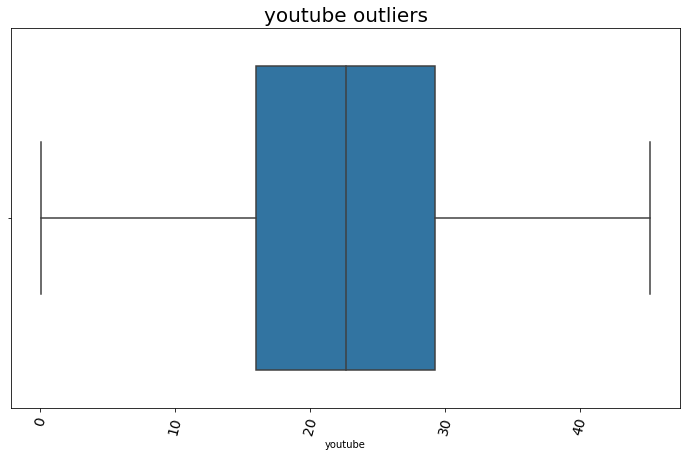

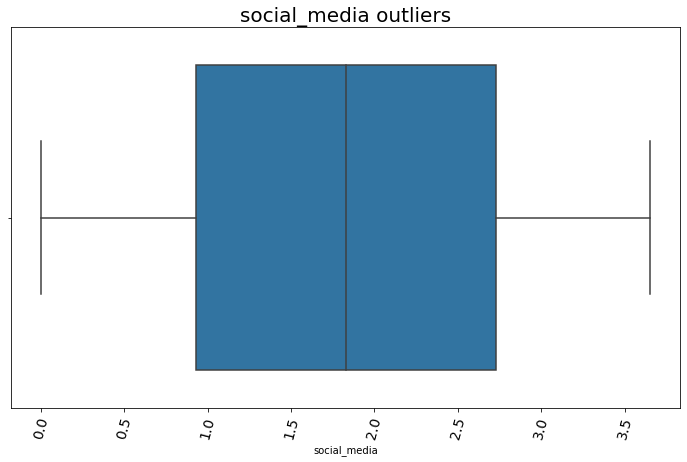

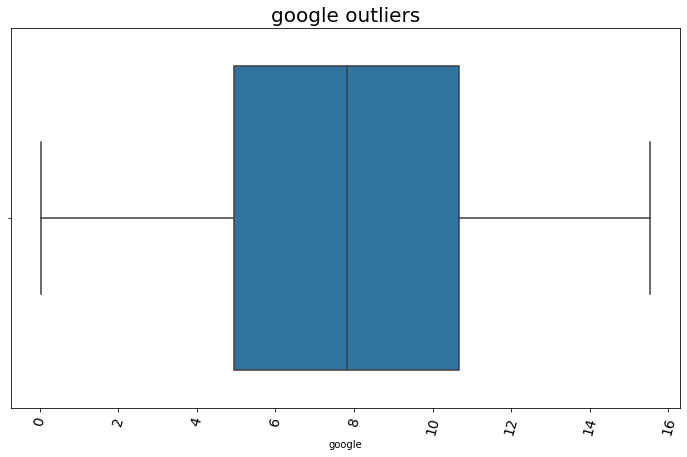

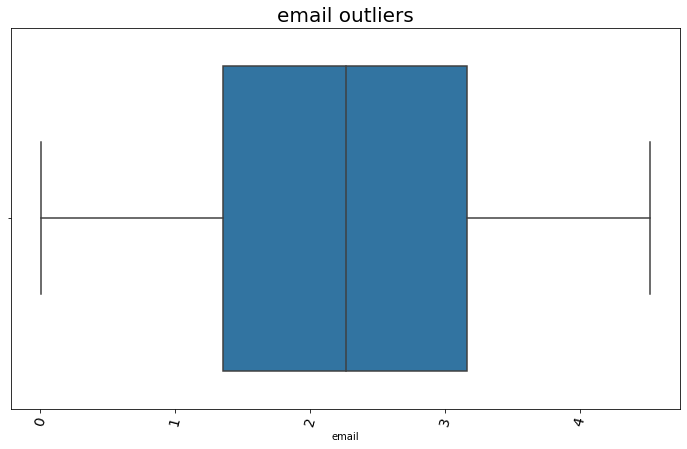

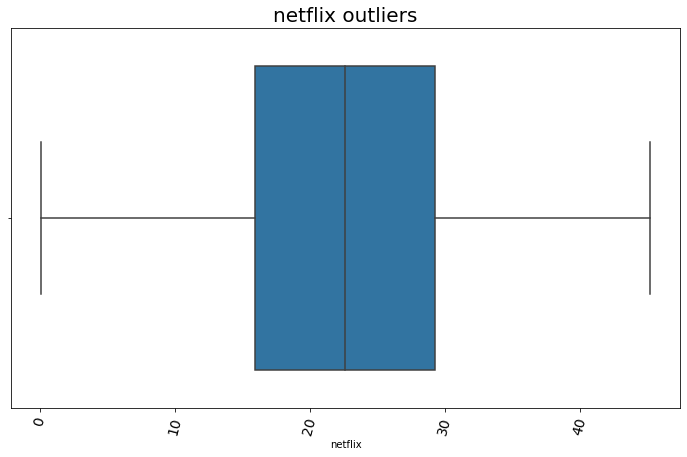

ValueError: Could not interpret input 'other_data'

<Figure size 864x504 with 0 Axes>

In [43]:
#Univarent graphical analysis
#Checking for Outliers

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()
    
plot_box(quntitative_df, "youtube", "youtube outliers")

plot_box(quntitative_df, "social_media", "social_media outliers")

plot_box(quntitative_df, "google", "google outliers")

plot_box(quntitative_df, "email", "email outliers")

plot_box(quntitative_df, "netflix", "netflix outliers")

plot_box(quntitative_df, "other_data", "other_data outliers")

plot_box(quntitative_df, "total_data", "total_data outliers")


In [ ]:
plot_box(quntitative_df, "Dur. (ms)", "duration")
# seeing the plot this column has outliners

In [ ]:
#addressing the outliner
quntitative_df['Dur. (ms)'] = np.where(quntitative_df['Dur. (ms)'] > quntitative_df['Dur. (ms)'].quantile(0.95),
                                         quntitative_df['Dur. (ms)'].mode(),quntitative_df['Dur. (ms)'])
plot_box(quntitative_df, "Dur. (ms)", "duration")

<Figure size 648x504 with 0 Axes>

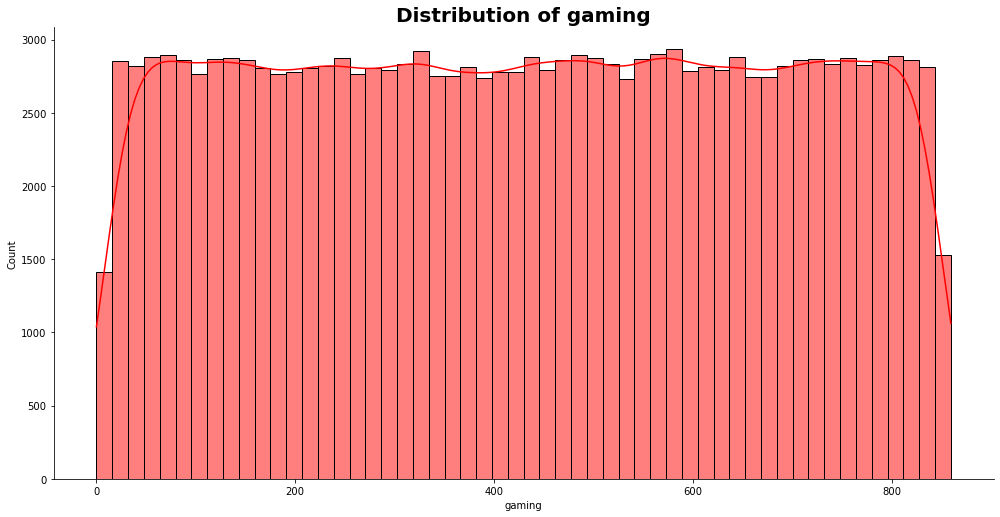

<Figure size 648x504 with 0 Axes>

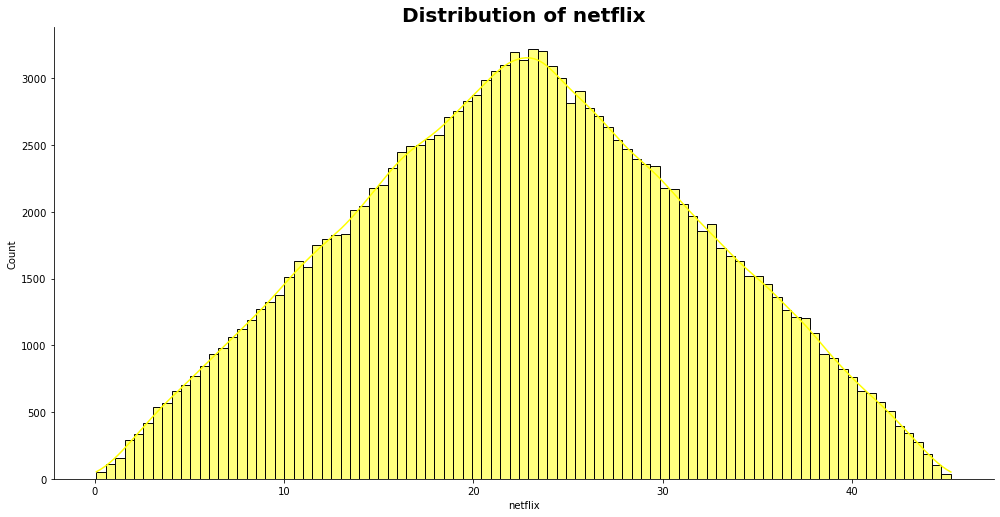

<Figure size 648x504 with 0 Axes>

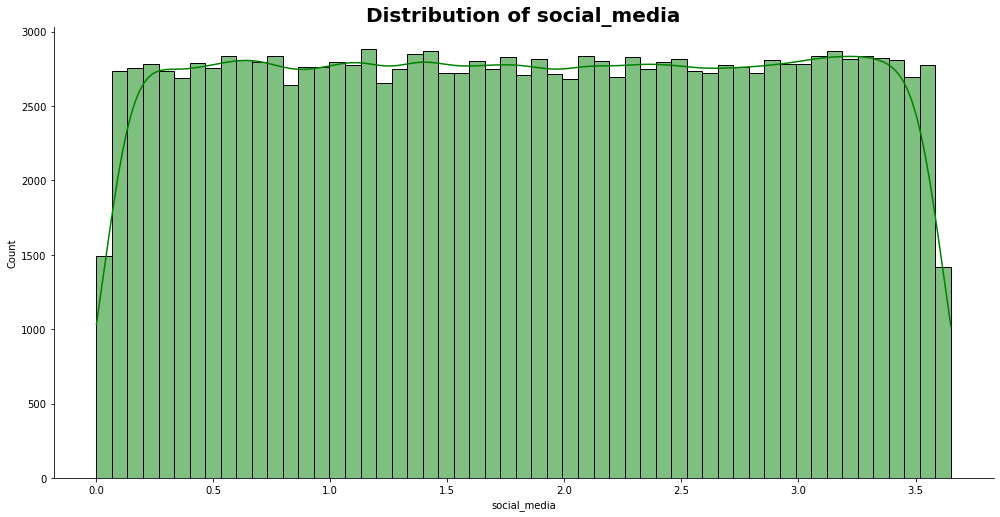

<Figure size 648x504 with 0 Axes>

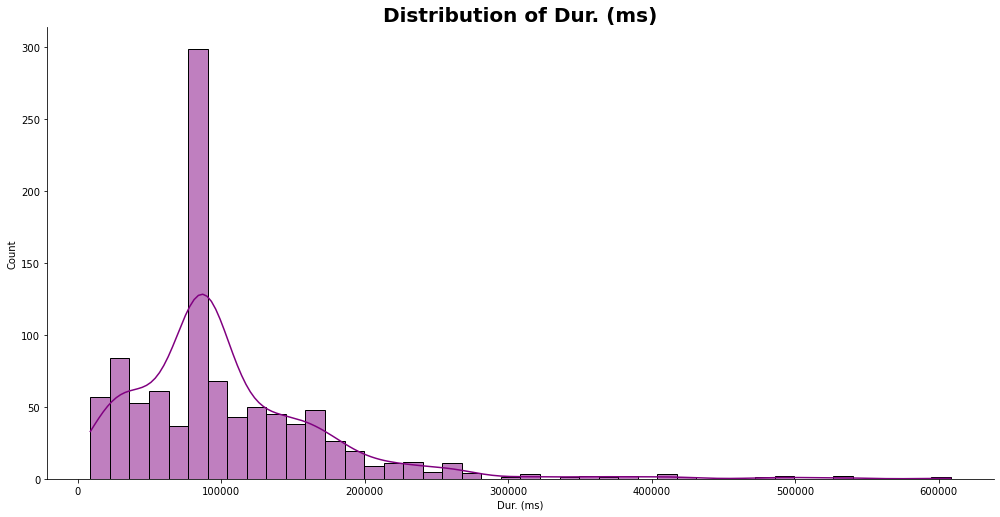

<Figure size 648x504 with 0 Axes>

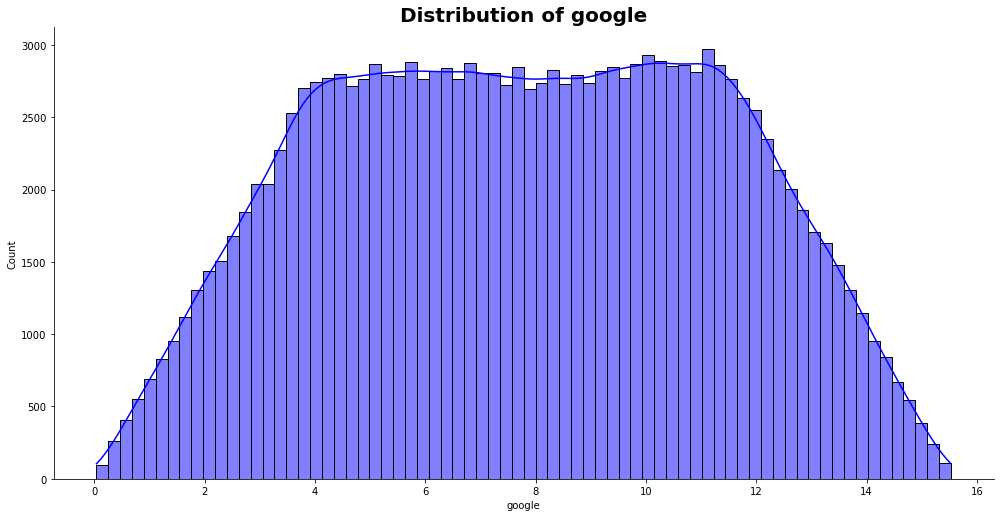

<Figure size 648x504 with 0 Axes>

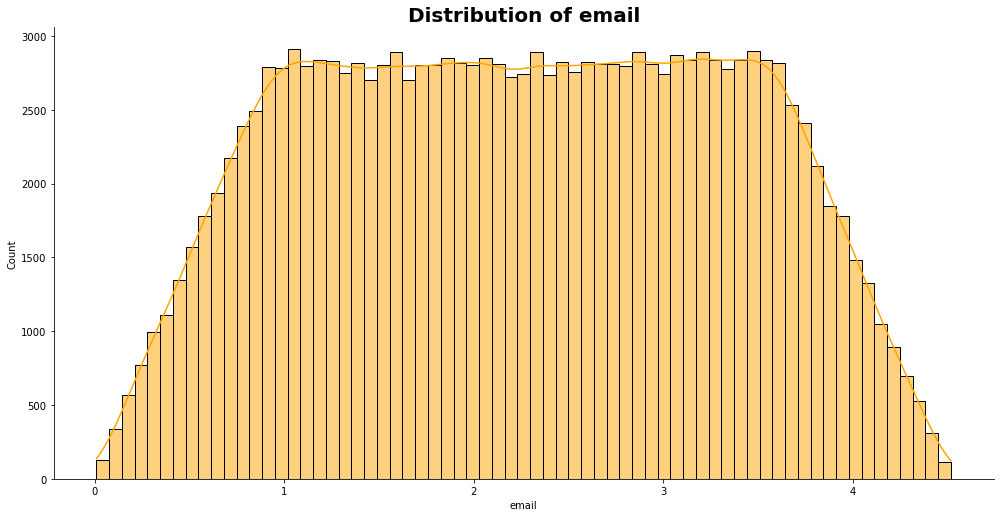

<Figure size 648x504 with 0 Axes>

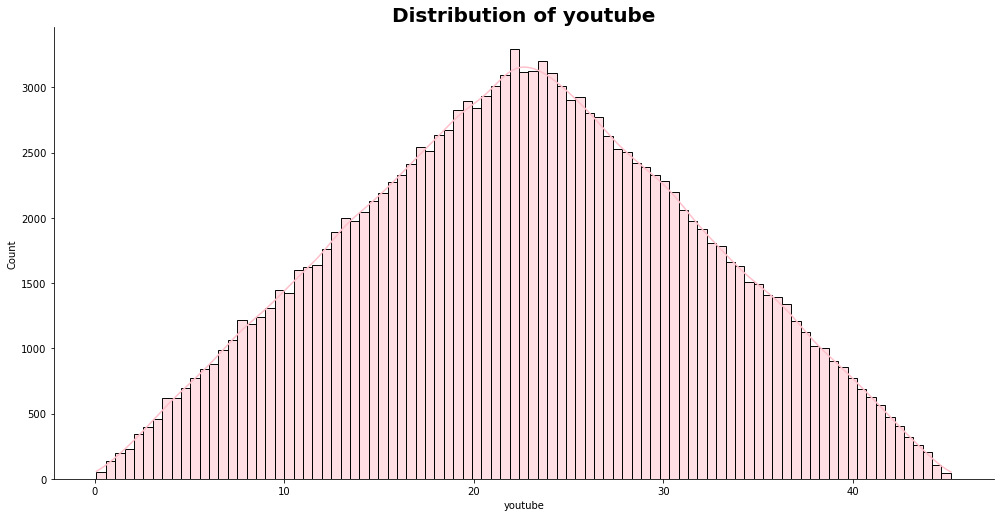

In [44]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
# from the utility function provided to plot the histogram 

plot_hist(quntitative_df, 'gaming', color='red')

plot_hist(quntitative_df, 'netflix', color='yellow')

plot_hist(quntitative_df, 'social_media', color='green')

plot_hist(quntitative_df.sample(1000), 'Dur. (ms)', color='purple')

plot_hist(quntitative_df, 'google', color='blue')

plot_hist(quntitative_df, 'email', color='orange')

plot_hist(quntitative_df, 'youtube', color='pink')


In [45]:
#Multi varent analysis

## Utility Functions

In [46]:
# From the google drive that was provided 

# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

Data Exploration or Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics which include:


*   detection of mistakes, outliers or abnormalities
*   determining relationships among the explanatory variables
*   assessing the relationships between explanatory and outcome variables





In [ ]:
dfExp = df_clean.copy()
dfExp

In [ ]:
dfExp.dtypes

### Univariate Analysis

This is mainly analysis done on particular variable only i.e we search for the data charecteristics of a variable with disregard to all the other columns

#### distributions

In [ ]:
plot_hist(dfExp, "Total DL (Bytes)", "blue")

In [ ]:
plot_hist(dfExp, "MSISDN/Number", "green")

In [ ]:
dfExp["IMSI"].describe()

#### Outliers

In [ ]:
plot_box(dfExp, "time_in_hospital", "time in hospital outliers")

In [ ]:
plot_box(dfExp, "num_lab_procedures", "number of lab procedures outliers")

In [ ]:
plot_box(dfExp, "num_medications", "number of medications outliers")

In [ ]:
dfExp["fixed_num_medications"] = fix_outlier(dfExp, "num_medications")

In [ ]:
plot_box(dfExp, "fixed_num_medications", "number of medications outliers")

In [ ]:
plot_hist(dfExp, "fixed_num_medications", "red")

In [ ]:
dfExp["fixed_num_medications"].describe()

#### categorical variables

In [ ]:
plot_count(dfExp, "Handset Type")

In [ ]:
plot_count(dfExp, "gender")

### Multivariate Analysis

This analysis that mainly done on two or more columns where we look for relationships between columns and how our data is distributed amoung values in multiple columns

#### scatter plots

In [ ]:
plot_scatter(dfExp.head(100), x_col="num_lab_procedures", y_col="num_medications", hue="race",
             style="race", title="number of medications vs number of lab procedures")

In [ ]:
plot_scatter(dfExp.head(1000), x_col="time_in_hospital", y_col="num_lab_procedures", hue="race",
             style="race", title="number of lab procedures vs time in hospital")

#### Box Plots

In [ ]:
plot_box_multi(dfExp, x_col="race", y_col="num_medications", title="number of medications outilers in race column")

In [ ]:
plot_box_multi(dfExp, x_col="gender", y_col="num_medications", title="number of medications outilers in race column")

#### pair plots

pair plots also known as scatterplot matrix, they allow us to see both distributions of single columns and the relationship between two columns

In [ ]:
dfPair = dfExp[["race", "time_in_hospital", "num_procedures", "num_lab_procedures", "num_medications"]]

In [ ]:
sns.pairplot(dfPair, hue = 'race', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)